# <font color='red'> Phase Diagram of a Harmonic Oscillator </font>

## 1. Using Arrays

### * The equation of motion for a harmonic oscillator is $\dot{x}=\frac{p}{m}$ and $\dot{p}=-m \omega^2 x$. Lets solve this with first order solver.

In [1]:
from matplotlib import pyplot as plt # We need this package to plot figures.

In [2]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt
    dp = -m*(ω**2)*x*δt
    return dx,dp

In [3]:
# TEST as you write...
dx,dp = Simple_Evolve_SHO(2,1,1e-4,1,1)
dx,dp

(0.0001, -0.0002)

### * Do not use for Loops unless you need to. Lets see this in action by first building a "loopy way" of evaluating all this.

In [4]:
def Evolve_Many_Times(x0,p0,δt,m,ω,num):
        x=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        p=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        x.append(x0) # Append function simply adds a given entry, x0 here, as the last entry to the list.
        p.append(p0) # APPEND IS A METHOD, which means that you use .append() method to do things. This should remind you of Object Oriented Programming...
        for i in range(1,num): # WHY did I write range(1,num) and not just range(num)?
            δx,δp = Simple_Evolve_SHO(x[i-1],p[i-1],δt,m,ω)
            x.append(x[i-1]+δx)
            p.append(p[i-1]+δp)
        return x,p

In [7]:
x0=.0
p0=.01
x,p=Evolve_Many_Times(x0,p0,1e-5,1,1,10**6)

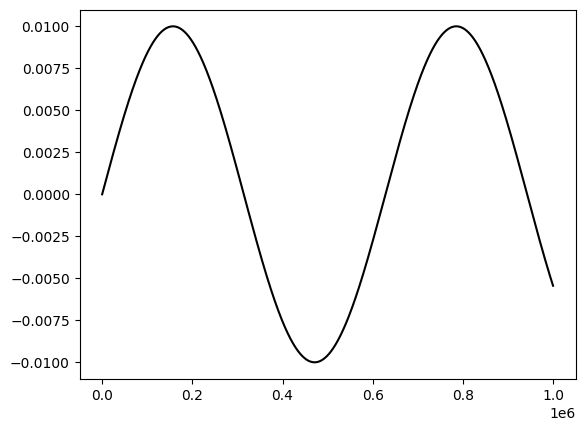

In [8]:
# Notice that this is a quick way to plot x,
# since I did not give the x-axis, plt plots x on the y-axis vs. array number on the x-axis.
plt.plot(x,'k')

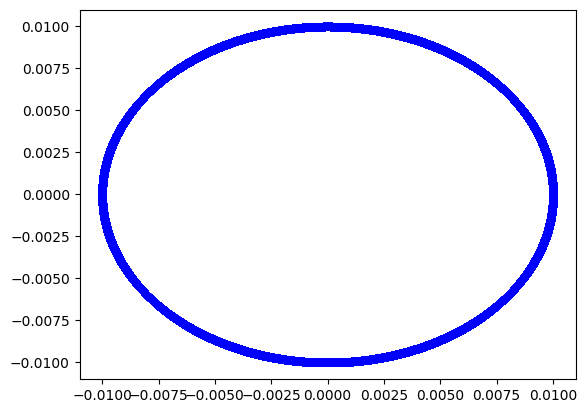

In [9]:
plt.plot(x,p,'b+')
#plt.axes().set_aspect('equal', 'datalim')

In [10]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

221 ns ± 1.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.15 µs ± 8.97 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
41.4 µs ± 50.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
435 µs ± 7.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.36 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.3 ms ± 98.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


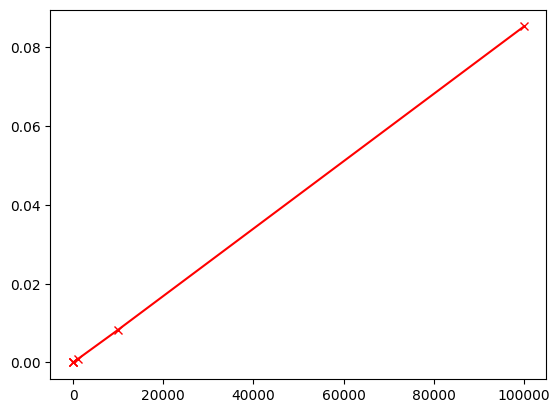

In [11]:
#IF you plot it, there is a bunch of points at the origin...
plt.plot([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rx-')

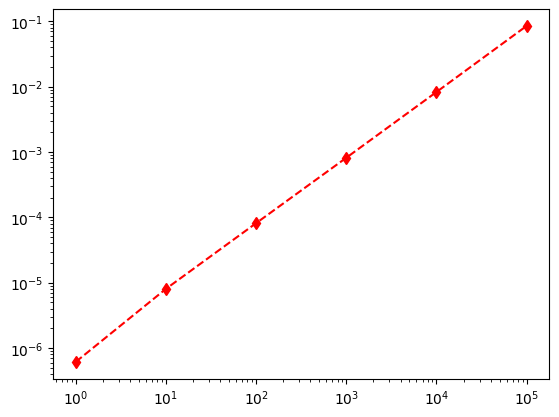

In [12]:
# Use semilogy or loglog to visualize this better
plt.loglog([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rd--')

## We learnt from the basic numpy notebook that numpy typically is better at this stuff. So lets see if we can make things better?

# 3. Using Integrators 
#### (see https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html)

In [13]:
import numpy as np

# In integrators , typically you are trying to solve a 1st order vector ODE of the form $\dot{\vec{y}}=f(\vec{y})$. You need to define the RHS.

In [14]:
def deriv(u, t, omega_squared):
    "Provides derivative of vector u."
    xdot, x = u
    return [-omega_squared * x, xdot]

In [15]:
from scipy.integrate import odeint
y0 = [0, 1]
snapshot_dt = 0.3
ts = np.arange(0, 12, snapshot_dt)
scipysol = odeint(deriv, y0, ts, args=(1,))

In [16]:
odeint?

Signature:
odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `

In [ ]:
scipysol

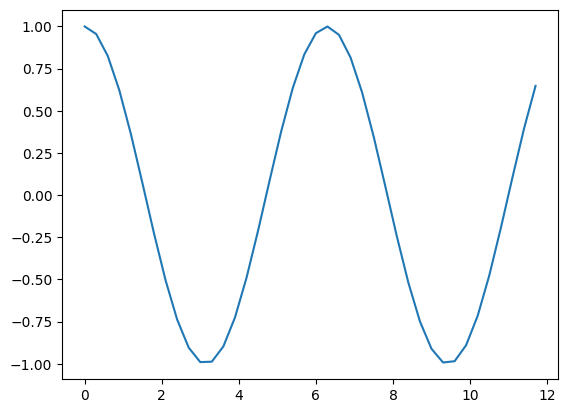

In [17]:
plt.plot(ts, scipysol[:, 1])

# 4. Doing things Smartly. Exponential of the evolution operator.

In [18]:
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function

In [19]:
expm?

Signature: expm(A)
Docstring:
Compute the matrix exponential of an array.

Parameters
----------
A : ndarray
    Input with last two dimensions are square ``(..., n, n)``.

Returns
-------
eA : ndarray
    The resulting matrix exponential with the same shape of ``A``

Notes
-----
Implements the algorithm given in [1], which is essentially a Pade
approximation with a variable order that is decided based on the array
data.

For input with size ``n``, the memory usage is in the worst case in the
order of ``8*(n**2)``. If the input data is not of single and double
precision of real and complex dtypes, it is copied to a new array.

For cases ``n >= 400``, the exact 1-norm computation cost, breaks even with
1-norm estimation and from that point on the estimation scheme given in
[2] is used to decide on the approximation order.

References
----------
.. [1] Awad H. Al-Mohy and Nicholas J. Higham, (2009), "A New Scaling
       and Squaring Algorithm for the Matrix Exponential", SIAM J. Matrix


In [ ]:
expm(np.zeros((2,2)))

# Notice that you can write $\vec{z}(t)=e^{Mt}\vec{z}(0)$

In [20]:
def Integrate_Using_Exp(δt,m,ω):
        M=np.array([[0,1/m],[-m*(ω**2),0]]) # Evaluate the matrix
        Evolution=expm(M*δt) # Evaluate its exponential
        return Evolution # Return it.

In [21]:
z0=np.random.rand(2,1) # Initialize the phase trajectory somewhere random in the unit circle.
z0

array([[0.1385603 ],
       [0.34716338]])

In [22]:
U=Integrate_Using_Exp(1e-5,1,1)
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [24]:
def Evolve_Using_Numpy(U,z0,num):
    x=np.zeros(num)
    p=np.zeros(num)
    z=z0
    for i in range(num):
        x[i]=z[0]
        p[i]=z[1]
        z = U.dot(z)
        
    return(x,p)

In [25]:
Evolve_Using_Numpy(U,z0,10**5)

(array([0.1385603 , 0.13856377, 0.13856725, ..., 0.36699024, 0.36699095,
        0.36699166]),
 array([0.34716338, 0.347162  , 0.34716061, ..., 0.07098971, 0.07098604,
        0.07098237]))

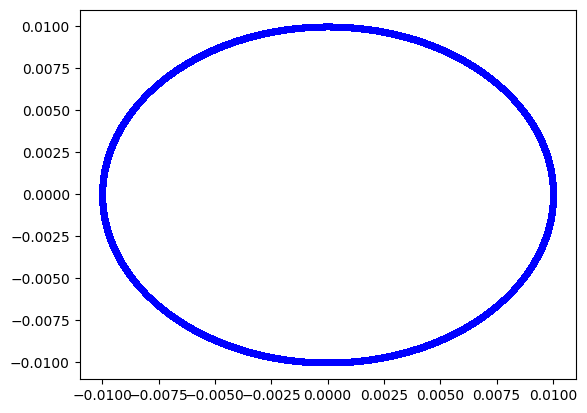

In [26]:
plt.plot(x,p,'b.')
#plt.axes().set_aspect('equal', 'datalim')

In [27]:
for i in range(6):
        %timeit Evolve_Using_Numpy(U,z0,10**i)

986 ns ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
6.78 µs ± 23.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
63.5 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
637 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.63 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
66.6 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Comparing with before, nothing good seems to have been achieved. 
# Reason for that is we are not using vectorization properly. 
# We are still going through loops.

In [28]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

224 ns ± 6.49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.21 µs ± 73.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
42.8 µs ± 655 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
439 µs ± 8.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.48 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.7 ms ± 360 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
z0

In [ ]:
U

In [29]:
from numpy.linalg import matrix_power
matrix_power(U, 2).dot(z0).transpose()

array([[0.13856725, 0.34716061]])

In [39]:
def Evolve_Using_Numpy_List_Comp(U,z0,num): # I have added List_Comp for list comprehension
    Z=[(matrix_power(U, i)).dot(z0).transpose() for i in range(num)]
    return Z

In [40]:
Z=Evolve_Using_Numpy_List_Comp(U,z0,5)

In [41]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

2.85 µs ± 44.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
39.3 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
869 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
14.4 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
189 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Still no speedup. So whats happening?


In [34]:
Dim = 10


In [35]:
δt=1e-5
F = np.random.rand(Dim,Dim) +1j*np.random.rand(Dim,Dim) 
Fd=F.conj().T
H=F.dot(Fd)
U=expm(-1j*H*δt)

In [36]:
z0=np.random.rand(Dim)

In [37]:
U.dot(z0)

array([0.16460315-0.00015138j, 0.92253712-0.00019131j,
       0.18266312-0.0001801j , 0.17512638-0.00023279j,
       0.2038793 -0.00015222j, 0.43489599-0.00020902j,
       0.14225952-0.00016422j, 0.65883766-0.00018399j,
       0.8050595 -0.00020605j, 0.1539671 -0.00018208j])

In [38]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

2.91 µs ± 61.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
41 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
886 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.7 ms ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
228 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# EXERCISES: 
## Write a code to solve time dependant phase trajectory for damped SHO $\ddot{x}+\omega^2 x+\dot{x}=\epsilon\cos(\omega_d t)$

In [ ]:
import numpy as np

In [ ]:
z0=np.array([1,0])

In [ ]:
θ=np.pi/3
M=np.array([[np.cos(θ),np.sin(θ)],[-np.sin(θ),np.cos(θ)]]) # Rotation matrix. 

In [ ]:
def Repeat_Mul(M,z0,n):
    if n==0:
        return z0
    else:
        return M@Repeat_Mul(M,z0,n-1)

In [ ]:
for i in range(4):
    %timeit Repeat_Mul(M,z0,10**i) # Memory issues

In [ ]:
def Repeat_Mul_2(M,z0,n):
    if n==1:
        return z0
    else:
        for i in range(1,n+1):
            z0 = M@z0
        return z0    

In [ ]:
for i in range(5):
    %timeit Repeat_Mul_2(M,z0,10**i) # Memory issues

In [ ]:
Repeat_Mul_2(M,z0,136)

# Using "List Comprehension" for time dependant Hamiltonians.

In [ ]:
t=np.linspace(0,10,100)
ω=np.pi/5

In [ ]:
σx=np.array([[0,1],[1,0]])
σz=np.array([[1,0],[0,-1]])

In [ ]:
H=[σz+np.cos(ω*t0)*σx for t0 in t]

In [ ]:
H[54]